In [1]:
import pandas as pd
import numpy as np
import random
import seaborn as sns
%matplotlib inline
import matplotlib.pyplot as plt
import math
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

data = {'feature_1': [random.uniform(0, 1) for i in range(100)],
        'feature_2': [random.uniform(0, 1) for i in range(100)],
        'feature_3': [random.uniform(0, 1) for i in range(100)],
        'feature_4': [random.uniform(0, 1) for i in range(100)],
        'feature_5': [random.uniform(0, 1) for i in range(100)],
        'feature_6': [random.uniform(0, 1) for i in range(100)],
        'feature_7': [random.uniform(0, 1) for i in range(100)],
        'feature_8': [random.uniform(0, 1) for i in range(100)],
        'feature_9': [random.uniform(0, 1) for i in range(100)],
        'feature_10': [random.uniform(0, 1) for i in range(100)],
        'label': [random.choice(['A', 'B', 'C']) for i in range(100)]}

df = pd.DataFrame(data)
df.head()

,feature_1,feature_2,feature_3,feature_4,feature_5,feature_6,feature_7,feature_8,feature_9,feature_10,label
0,0.049750,0.064783,0.216139,0.078633,0.786842,0.658365,0.121226,0.163600,0.595873,0.598603,A
1,0.592338,0.809385,0.828288,0.894265,0.007281,0.151667,0.742994,0.472862,0.095628,0.210710,B
2,0.934191,0.207591,0.365272,0.192482,0.172573,0.149040,0.412580,0.799693,0.025068,0.901864,B
3,0.358709,0.300320,0.728444,0.522416,0.616432,0.770996,0.338681,0.137117,0.835827,0.284694,A
4,0.690478,0.362572,0.103870,0.351009,0.889828,0.091999,0.548460,0.152876,0.414792,0.428731,B


In [ ]:
features = ['feature_1', 'feature_2', 'feature_3', 'feature_4','feature_5', 'feature_6', 'feature_7', 'feature_8', 'feature_9', 'feature_10']
x = df.loc[:, features].values

In [ ]:
y = df.loc[:,['label']].values

In [ ]:
pd.DataFrame(data = x, columns = features).head()

,feature_1,feature_2,feature_3,feature_4,feature_5,feature_6,feature_7,feature_8,feature_9,feature_10
0,0.120171,0.597658,0.748403,0.017877,0.281573,0.026576,0.568958,0.831090,0.892654,0.652184
1,0.683858,0.770219,0.872656,0.564669,0.101567,0.645898,0.853885,0.837915,0.317446,0.567700
2,0.060760,0.620837,0.793853,0.257592,0.121210,0.134083,0.089703,0.333215,0.171383,0.581646
3,0.948460,0.643550,0.685739,0.170071,0.014723,0.621447,0.448171,0.158111,0.023961,0.714614
4,0.479973,0.309479,0.278343,0.018802,0.916215,0.693915,0.226925,0.399781,0.800434,0.285459


In [ ]:
pca = PCA(n_components=2)

In [ ]:
principalComponents = pca.fit_transform(x)

In [ ]:
principalDf = pd.DataFrame(data = principalComponents
             , columns = ['principal component 1', 'principal component 2'])

In [ ]:
principalDf.head(5)

,principal component 1,principal component 2
0,0.064168,0.474296
1,0.661296,-0.044670
2,-0.347011,0.291363
3,0.067152,-0.505709
4,-0.498416,-0.172528


In [ ]:
df[['label']].head()

,label
0,B
1,B
2,B
3,A
4,B


In [ ]:
finalDf = pd.concat([principalDf, df[['label']]], axis = 1)
finalDf.head(5)

,principal component 1,principal component 2,label
0,0.064168,0.474296,B
1,0.661296,-0.044670,B
2,-0.347011,0.291363,B
3,0.067152,-0.505709,A
4,-0.498416,-0.172528,B


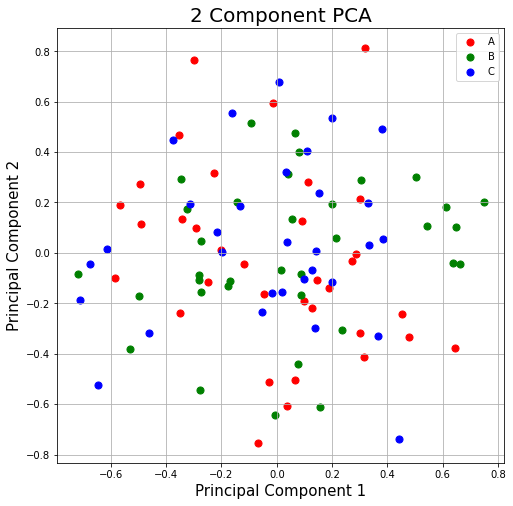

In [ ]:
fig = plt.figure(figsize = (8,8))
ax = fig.add_subplot(1,1,1) 
ax.set_xlabel('Principal Component 1', fontsize = 15)
ax.set_ylabel('Principal Component 2', fontsize = 15)
ax.set_title('2 Component PCA', fontsize = 20)


targets = ['A', 'B', 'C']
colors = ['r', 'g', 'b']
for target, color in zip(targets,colors):
    indicesToKeep = finalDf['label'] == target
    ax.scatter(finalDf.loc[indicesToKeep, 'principal component 1']
               , finalDf.loc[indicesToKeep, 'principal component 2']
               , c = color
               , s = 50)
ax.legend(targets)
ax.grid()